In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
# define constant

FOLDER = 'datas/s15t1.6/'
GESTURES = ['l', 'r', 'u', 'd', 'ld', 'rd']
DATA_POINT_PER_GESTURE = 15
# GESTURES = ['l', 'r', 'u', 'd', 'ld', 'rd']
#

SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

## Visualize raw data

In [3]:
# for g in GESTURES:
#     df = pd.read_csv(FOLDER + g + '.csv')
    
#     xs = range(1, len(df['aX']) + 1)
    
#     plt.rcParams['figure.figsize'] = (30, 15)
    
#     plt.plot(xs, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
#     plt.plot(xs, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
#     plt.plot(xs, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
#     plt.title("Acceleration")
#     plt.xlabel("Sample #")
#     plt.ylabel("Acceleration (G)")
#     plt.legend()
#     plt.show()

#     plt.plot(xs, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
#     plt.plot(xs, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
#     plt.plot(xs, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
#     plt.title("Gyroscope")
#     plt.xlabel("Sample #")
#     plt.ylabel("Gyroscope (deg/sec)")
#     plt.legend()
#     plt.show()

## Process data

In [4]:
inputs = []
outputs = []

ONE_HOTS = np.eye(len(GESTURES))

for i in range(len(GESTURES)):
    g = GESTURES[i]
    print(f"Processing {i} for gesture '{g}'.")
    
    output = ONE_HOTS[i]
    
    df = pd.read_csv(FOLDER + g + '.csv')
    num_recordings = int(df.shape[0] / DATA_POINT_PER_GESTURE)
    
    for j in range(num_recordings):
        tensor = []
        
        for k in range(DATA_POINT_PER_GESTURE):
            kk = j * DATA_POINT_PER_GESTURE + k
            
            tensor += [
                df['aX'][kk],
                df['aY'][kk],
                df['aZ'][kk],
                df['gX'][kk],
                df['gY'][kk],
                df['gZ'][kk],
            ]
            
        inputs.append(tensor)
        outputs.append(output)

Processing 0 for gesture 'l'.
Processing 1 for gesture 'r'.
Processing 2 for gesture 'u'.
Processing 3 for gesture 'd'.
Processing 4 for gesture 'ld'.
Processing 5 for gesture 'rd'.


In [5]:
display(pd.DataFrame(inputs))

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.515,0.302,0.291,0.542,0.417,0.493,0.464,0.316,0.313,0.515,...,0.658,0.490,0.527,0.490,0.441,0.332,0.614,0.490,0.535,0.497
1,0.618,0.369,0.261,0.556,0.459,0.522,0.581,0.344,0.260,0.550,...,0.781,0.494,0.490,0.500,0.426,0.364,0.734,0.497,0.513,0.504
2,0.616,0.319,0.262,0.546,0.446,0.511,0.553,0.299,0.266,0.537,...,0.733,0.507,0.490,0.495,0.453,0.345,0.695,0.504,0.507,0.498
3,0.537,0.346,0.263,0.551,0.418,0.512,0.463,0.329,0.276,0.540,...,0.728,0.498,0.503,0.502,0.441,0.342,0.681,0.500,0.520,0.506
4,0.470,0.316,0.299,0.527,0.390,0.514,0.423,0.319,0.336,0.511,...,0.633,0.501,0.528,0.499,0.471,0.347,0.596,0.504,0.534,0.503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.376,0.612,0.492,0.570,0.640,0.574,0.360,0.603,0.473,0.574,...,0.220,0.470,0.482,0.504,0.417,0.550,0.252,0.470,0.469,0.503
116,0.393,0.581,0.509,0.577,0.637,0.581,0.370,0.597,0.494,0.576,...,0.212,0.480,0.482,0.510,0.416,0.571,0.244,0.480,0.467,0.508
117,0.361,0.609,0.487,0.601,0.657,0.585,0.332,0.626,0.446,0.604,...,0.231,0.468,0.467,0.509,0.402,0.568,0.262,0.472,0.455,0.508
118,0.343,0.582,0.433,0.585,0.669,0.561,0.333,0.578,0.401,0.577,...,0.291,0.470,0.455,0.508,0.390,0.571,0.322,0.475,0.451,0.506


## Create train/validate/test datas

In [6]:
rdm_index = np.arange(len(inputs))
np.random.shuffle(rdm_index)

inputs = np.array(inputs)[rdm_index]
outputs = np.array(outputs)[rdm_index]

TRAIN_SPLIT = int(0.5 * len(inputs))
TEST_SPLIT = int(TRAIN_SPLIT + 0.25 * len(inputs))

i_train, i_validate, i_test = np.split(inputs, [TRAIN_SPLIT, TEST_SPLIT])
o_train, o_validate, o_test = np.split(outputs, [TRAIN_SPLIT, TEST_SPLIT])

# do this if data type invalid
i_train = tf.convert_to_tensor(i_train, dtype=tf.float32)
o_train = tf.convert_to_tensor(o_train, dtype=tf.float32)

i_validate = tf.convert_to_tensor(i_validate, dtype=tf.float32)
o_validate = tf.convert_to_tensor(o_validate, dtype=tf.float32)

## Build and train the model

In [7]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']="TRUE"


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(8, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(GESTURES), activation='softmax')
])


model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

history = model.fit(i_train, o_train,
                       epochs=100, batch_size=1,
                   validation_data=(i_validate, o_validate))

Epoch 1/100
60/60 [==============================] - 1s 6ms/step - loss: 0.1422 - mae: 0.2708 - val_loss: 0.1394 - val_mae: 0.2745
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1354 - mae: 0.2711 - val_loss: 0.1353 - val_mae: 0.2710
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1317 - mae: 0.2665 - val_loss: 0.1320 - val_mae: 0.2679
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1281 - mae: 0.2638 - val_loss: 0.1289 - val_mae: 0.2621
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1242 - mae: 0.2581 - val_loss: 0.1252 - val_mae: 0.2577
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1195 - mae: 0.2517 - val_loss: 0.1219 - val_mae: 0.2548
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1151 - mae: 0.2463 - val_loss: 0.1190 - val_mae: 0.2502
Epoch 8/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1100 - m

60/60 [==============================] - 0s 3ms/step - loss: 0.0047 - mae: 0.0149 - val_loss: 0.0104 - val_mae: 0.0286
Epoch 64/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0046 - mae: 0.0174 - val_loss: 0.0082 - val_mae: 0.0223
Epoch 65/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0051 - mae: 0.0154 - val_loss: 0.0075 - val_mae: 0.0253
Epoch 66/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0047 - mae: 0.0148 - val_loss: 0.0078 - val_mae: 0.0242
Epoch 67/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0048 - mae: 0.0147 - val_loss: 0.0080 - val_mae: 0.0205
Epoch 68/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0043 - mae: 0.0136 - val_loss: 0.0081 - val_mae: 0.0205
Epoch 69/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0051 - mae: 0.0146 - val_loss: 0.0078 - val_mae: 0.0213
Epoch 70/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0048 - mae: 0

In [9]:
# performance before train
model(i_train[:1])

<tf.Tensor: shape=(1, 6), dtype=float32, numpy=
array([[3.5389328e-06, 9.9174678e-01, 2.0575912e-05, 8.1507664e-04,
        5.8012572e-03, 1.6127833e-03]], dtype=float32)>

## Review model's performance

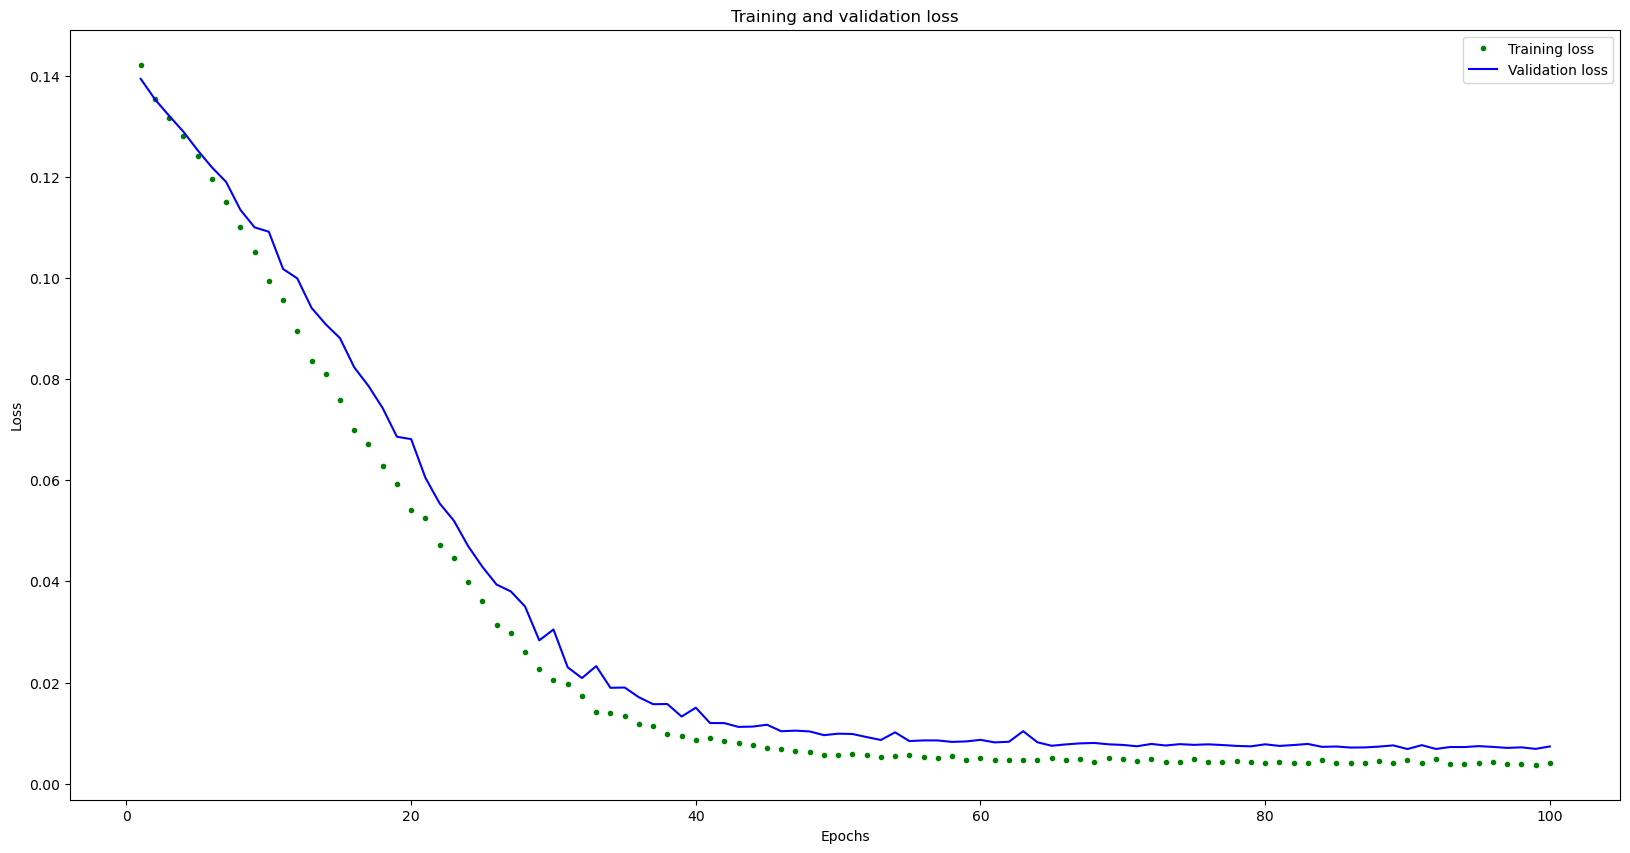

[20.0, 10.0]


In [10]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

### Mean absolute error

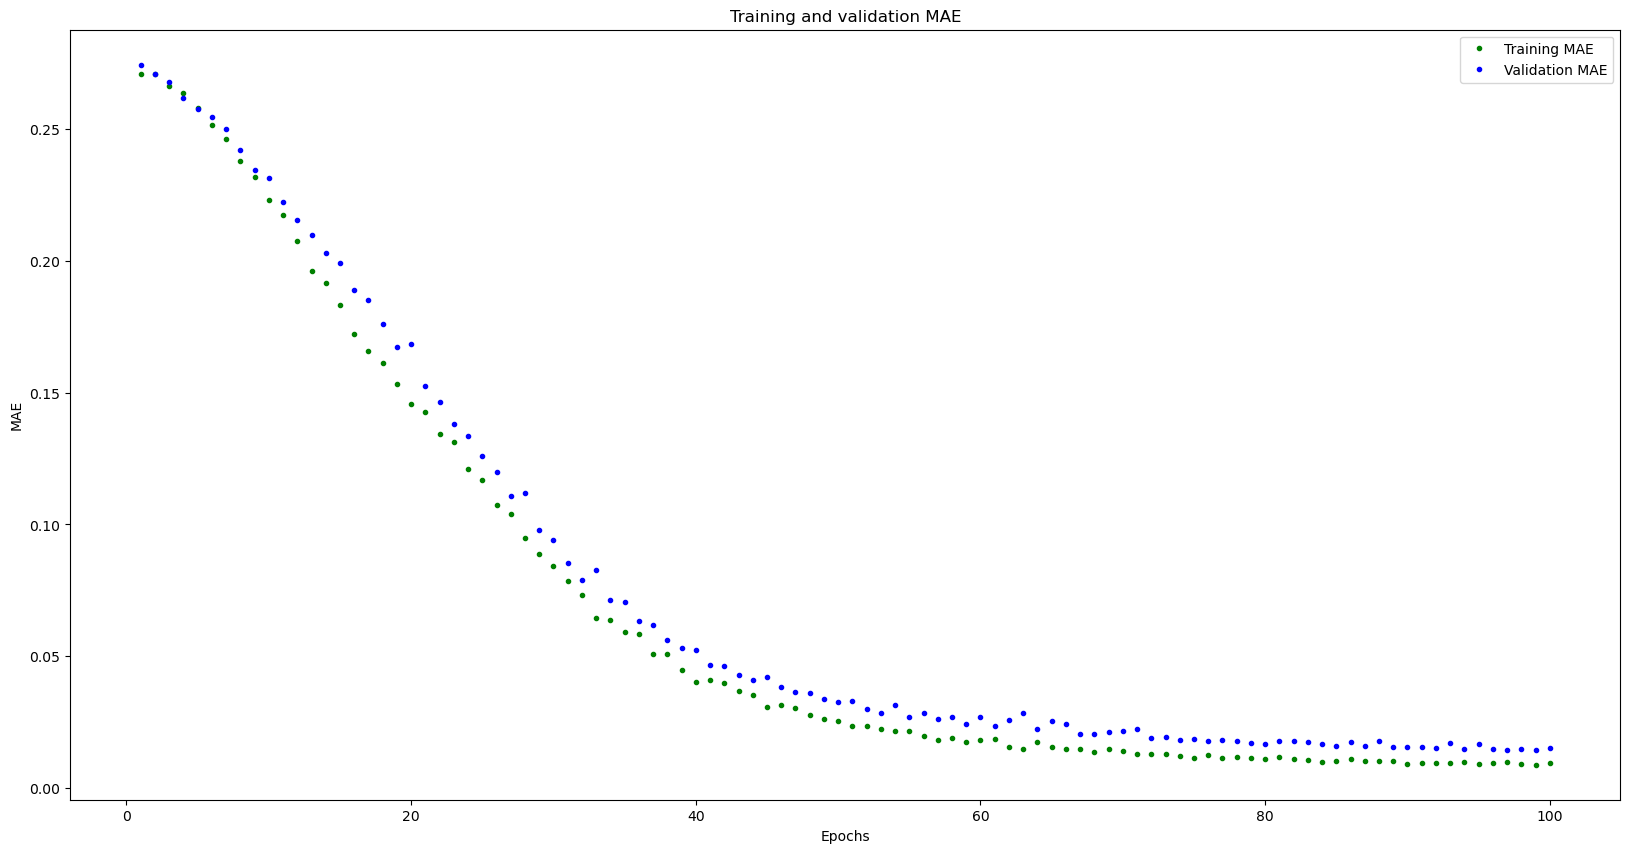

In [11]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs, mae, 'g.', label='Training MAE')
plt.plot(epochs, val_mae, 'b.', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Verify with test data

In [12]:
i_test = tf.convert_to_tensor(i_test, dtype=tf.float32)

# use the model to predict the test inputs
predictions = model.predict(i_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", o_test)

1/1 [==============================] - 0s 112ms/step
predictions =
 [[0.    0.    1.    0.    0.    0.   ]
 [0.001 0.009 0.    0.001 0.989 0.   ]
 [0.996 0.    0.001 0.    0.002 0.   ]
 [0.001 0.008 0.    0.001 0.99  0.   ]
 [0.    0.    0.008 0.992 0.    0.   ]
 [0.001 0.001 0.004 0.994 0.001 0.   ]
 [0.001 0.001 0.002 0.996 0.    0.   ]
 [0.002 0.001 0.002 0.992 0.002 0.   ]
 [0.    0.996 0.    0.    0.    0.004]
 [0.    0.    0.007 0.    0.    0.992]
 [0.001 0.005 0.    0.001 0.993 0.   ]
 [0.    0.996 0.    0.    0.001 0.004]
 [0.994 0.    0.003 0.    0.003 0.   ]
 [0.    0.997 0.    0.    0.001 0.002]
 [0.    0.014 0.007 0.    0.    0.979]
 [0.    0.    0.008 0.    0.    0.992]
 [0.    0.    0.997 0.    0.    0.003]
 [0.91  0.    0.002 0.011 0.077 0.001]
 [0.982 0.    0.004 0.001 0.013 0.001]
 [0.49  0.03  0.    0.001 0.478 0.001]
 [0.13  0.    0.839 0.    0.011 0.02 ]
 [0.004 0.001 0.002 0.006 0.985 0.001]
 [0.002 0.001 0.    0.    0.997 0.001]
 [0.    0.006 0.006 0.    0.    0.9

## Produce model file (.tflite)

Output both non-quantized and quantized model files


In [13]:
TFLITE_FILE = 'tflite/gesture_model.tflite'
TFLITE_FILE_Q = 'tflite/gesture_model_q.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

open(TFLITE_FILE, "wb").write(tflite_model)


converter_q = tf.lite.TFLiteConverter.from_keras_model(model)
converter_q.optimizations = [tf.lite.Optimize.DEFAULT]

def representative_dataset_generator():
 # each scalar value inside a 2D array that is wrapped in a list
 for value in inputs:
     yield [np.array(value, dtype=np.float32, ndmin=2)]

converter_q.representative_dataset = representative_dataset_generator
tflite_model_q = converter_q.convert()

open(TFLITE_FILE_Q, "wb").write(tflite_model_q)


# Review size difference
basic_model_size = os.path.getsize(TFLITE_FILE)
print("Basic model is %d bytes" % basic_model_size)

basic_model_size_q = os.path.getsize(TFLITE_FILE_Q)
print("Quantized model is %d bytes" % basic_model_size_q)

INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpp44nkk5r\assets
INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpxzn2kwnf\assets


INFO:tensorflow:Assets written to: C:\Users\cheew\AppData\Local\Temp\tmpxzn2kwnf\assets


Basic model is 8676 bytes
Quantized model is 4568 bytes


C:\Users\cheew\anaconda3\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


## Verify the interpreter (.tflite)

In [14]:
_model = tf.lite.Interpreter(TFLITE_FILE)

_model.allocate_tensors()

_model_input_index = _model.get_input_details()[0]['index']
_model_output_index = _model.get_output_details()[0]['index']

_model_predictions = []

for i in i_test:
    # write the value to the input tensor
    i_tensor = tf.convert_to_tensor([i], dtype=tf.float32)
    _model.set_tensor(_model_input_index, i_tensor)
    # run inference
    _model.invoke()
    # read the prediction from the output tensor
    _model_predictions.append(_model.get_tensor(_model_output_index)[0])

# print the predictions and the expected ouputs
print("model predictions =\n", np.round(_model_predictions, decimals=3))
print("actual =\n", o_test)

model predictions =
 [[0.    0.    1.    0.    0.    0.   ]
 [0.001 0.009 0.    0.001 0.989 0.   ]
 [0.996 0.    0.001 0.    0.002 0.   ]
 [0.001 0.008 0.    0.001 0.99  0.   ]
 [0.    0.    0.008 0.992 0.    0.   ]
 [0.001 0.001 0.004 0.994 0.001 0.   ]
 [0.001 0.001 0.002 0.996 0.    0.   ]
 [0.002 0.001 0.002 0.992 0.002 0.   ]
 [0.    0.996 0.    0.    0.    0.004]
 [0.    0.    0.007 0.    0.    0.992]
 [0.001 0.005 0.    0.001 0.993 0.   ]
 [0.    0.996 0.    0.    0.001 0.004]
 [0.994 0.    0.003 0.    0.003 0.   ]
 [0.    0.997 0.    0.    0.001 0.002]
 [0.    0.014 0.007 0.    0.    0.979]
 [0.    0.    0.008 0.    0.    0.992]
 [0.    0.    0.997 0.    0.    0.003]
 [0.91  0.    0.002 0.011 0.077 0.001]
 [0.982 0.    0.004 0.001 0.013 0.001]
 [0.49  0.03  0.    0.001 0.478 0.001]
 [0.13  0.    0.839 0.    0.011 0.02 ]
 [0.004 0.001 0.002 0.006 0.985 0.001]
 [0.002 0.001 0.    0.    0.997 0.001]
 [0.    0.006 0.006 0.    0.    0.988]
 [0.002 0.001 0.001 0.    0.995 0.002]
 [0.

## Verify the quantized interpreter (.tflite)

In [15]:
_model_q = tf.lite.Interpreter(TFLITE_FILE_Q)

_model_q.allocate_tensors()

_model_q_input_index = _model_q.get_input_details()[0]['index']
_model_q_output_index = _model_q.get_output_details()[0]['index']

_model_q_predictions = []

for i in i_test:
    # write the value to the input tensor
    i_tensor = tf.convert_to_tensor([i], dtype=tf.float32)
    _model_q.set_tensor(_model_q_input_index, i_tensor)
    # run inference
    _model_q.invoke()
    # read the prediction from the output tensor
    _model_q_predictions.append(_model_q.get_tensor(_model_q_output_index)[0])

# print the predictions and the expected ouputs
print("quantized model predictions =\n", np.round(_model_q_predictions, decimals=3))
print("actual =\n", o_test)

quantized model predictions =
 [[0.    0.    0.996 0.    0.    0.   ]
 [0.    0.012 0.    0.    0.988 0.   ]
 [0.996 0.    0.    0.    0.004 0.   ]
 [0.    0.012 0.    0.    0.988 0.   ]
 [0.    0.    0.008 0.992 0.    0.   ]
 [0.    0.    0.004 0.996 0.    0.   ]
 [0.    0.    0.    0.996 0.    0.   ]
 [0.004 0.    0.    0.992 0.004 0.   ]
 [0.    0.996 0.    0.    0.    0.004]
 [0.    0.    0.008 0.    0.    0.992]
 [0.    0.008 0.    0.    0.992 0.   ]
 [0.    0.996 0.    0.    0.    0.004]
 [0.992 0.    0.004 0.    0.004 0.   ]
 [0.    0.996 0.    0.    0.    0.004]
 [0.    0.016 0.004 0.    0.    0.98 ]
 [0.    0.    0.008 0.    0.    0.992]
 [0.    0.    0.996 0.    0.    0.004]
 [0.906 0.    0.    0.012 0.078 0.   ]
 [0.98  0.    0.004 0.    0.012 0.   ]
 [0.461 0.035 0.    0.    0.504 0.   ]
 [0.141 0.    0.828 0.    0.012 0.02 ]
 [0.004 0.    0.    0.004 0.988 0.   ]
 [0.    0.    0.    0.    0.996 0.   ]
 [0.    0.004 0.004 0.    0.    0.988]
 [0.004 0.    0.    0.    0.996 0

## Produce the model header file

In [16]:
# to run below command, ensure jupyter notebook is launched under bash terminal (eg. git bash, linux terminal)

HEADER_FILE = '../ble_client/gesture_model.h'
HEADER_FILE_Q = '../ble_client/gesture_model_q.h'
# based model header file
str1 = "const unsigned char {} [] = {{".format('gesture_model')
str2 = "};"

!echo {str1}  > {HEADER_FILE}
!cat {TFLITE_FILE} | xxd -i >> {HEADER_FILE}
!echo {str2} >> {HEADER_FILE}

# quantized model header file
str3 = "const unsigned char {} [] = {{".format('gesture_model_q')

!echo {str3}  > {HEADER_FILE_Q}
!cat {TFLITE_FILE_Q} | xxd -i >> {HEADER_FILE_Q}
!echo {str2} >> {HEADER_FILE_Q}